In [ ]:
!pip install dlib
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=ad2af26d95b1ca1abe62d8f1d5aec5b8d99533aa0815bc3362b3c08364a10734
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import face_recognition

In [ ]:
#https://wp-content.amenteemaravilhosa.com.br/2015/10/rostos-confianca.jpg
image = cv2.imread('rostos-confianca.jpg')

In [ ]:
locations = face_recognition.face_locations(image, model="hog")

In [ ]:
print(f"Temos {len(locations)} rostos na imagem")

Temos 16 rostos na imagem


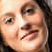

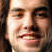

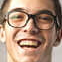

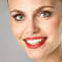

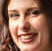

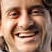

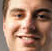

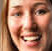

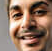

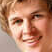

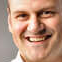

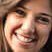

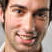

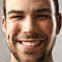

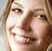

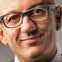

In [ ]:
for index, location in enumerate(locations):
  top, right, bottom, left = location
  rosto = image[top:bottom, left:right]
  cv2_imshow(rosto)

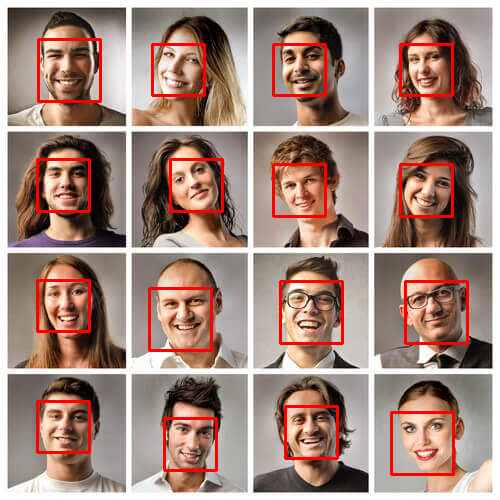

In [ ]:
for index, location in enumerate(locations):
  top, right, bottom, left = location
  cv2.rectangle(image, (left, top), (right, bottom), (0,0,255), 2)

cv2_imshow(image)

# Implementação para Vídeo

In [ ]:
video = cv2.VideoCapture('video.mp4')
res = (800,600)
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('video_final.mp4', fourcc, 20.0, res)

while True:
  ret, frame = video.read()
  if not ret:
    break
  frame_resized = cv2.resize(frame, (0,0), fx=0.25, fy=0.25)
  locations = face_recognition.face_locations(frame_resized, model="hog")
  for index, location in enumerate(locations):
    top, right, bottom, left = location
    cv2.rectangle(frame, (left*4, top*4), (right*4, bottom*4), (0,0,255), 2)

  frame_output = cv2.resize(frame, res)
  out.write(frame_output)

video.release()
out.release()

# Implementando o Blur no Vídeo

In [ ]:
video = cv2.VideoCapture('video.mp4')
res = (800,600)
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('video_final.mp4', fourcc, 20.0, res)

while True:
  ret, frame = video.read()
  if not ret:
    break
  frame_resized = cv2.resize(frame, (0,0), fx=0.25, fy=0.25)
  locations = face_recognition.face_locations(frame_resized, model="hog")
  for index, location in enumerate(locations):
    top, right, bottom, left = location

    rosto = frame[top*4:bottom*4, left*4:right*4]
    rosto = cv2.GaussianBlur(rosto, (99,99), 30)
    frame[top*4:bottom*4, left*4:right*4] = rosto

    #cv2.rectangle(frame, (left*4, top*4), (right*4, bottom*4), (0,0,255), 2)

  frame_output = cv2.resize(frame, res)
  out.write(frame_output)

video.release()
out.release()

# Trienando um modelo

In [ ]:
#https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer?resource=download
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

## Bibliotecas

### Kerras
Keras é uma biblioteca de alto nível para a construção e treinamento de modelos de aprendizado profundo (deep learning). Ela foi projetada para ser fácil de usar e intuitiva, permitindo que tanto iniciantes quanto especialistas criem rapidamente redes neurais complexas. A principal característica do Keras é sua interface amigável e a capacidade de definir modelos de forma simples e rápida, com um foco em experimentação e prototipagem.

Keras deve ser usado com o TensorFlow. Além disso, Keras suporta diferentes tipos de redes neurais, como redes convolucionais (CNNs), redes recorrentes (RNNs) e redes totalmente conectadas (Dense), entre outras.

### TensorFlow
TensorFlow é uma biblioteca de código aberto desenvolvida pelo Google para a construção e treinamento de modelos de aprendizado de máquina e aprendizado profundo.

### Kerras e TensorFlow
Desde a versão 2.0 do TensorFlow, Keras foi integrado diretamente à biblioteca, tornando-se a API de alto nível oficial para o TensorFlow.

In [ ]:
#https://medium.com/@ilaslanduzgun/facial-emotion-recognition-a-deep-learning-approach-with-keras-8e4fee7b7bb0

#As bibliotecas abaixo permitem criar um pipeline que inclui o pré-processamento de dados, construção do modelo,
#definição de camadas, configuração de um otimizador e a implementação de callbacks para gerenciar o treinamento

from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Esta classe é usada para gerar novas imagens de treinamento em tempo real.
#Usa as técnicas de criar versões modificadas das imagens de treinamento (rotações, ampliações, inversões, etc.)
#Ajuda a prevenir o overfitting

from tensorflow.keras.models import Sequential
#Sequential: Esta é uma maneira simples de construir um modelo de rede neural onde as camadas são empilhadas umas sobre as outras.

from tensorflow.keras.layers import Dense,Dropout,Flatten
#Dense: Representa uma camada totalmente conectada, onde cada neurônio de uma camada está conectado a todos os neurônios da próxima camada.
#Dropout: Esta camada é utilizada para regularização, desligando uma fração dos neurônios durante o treinamento para prevenir overfitting.
#Flatten: Converte a entrada multidimensional (como uma imagem) em uma única dimensão para ser alimentada nas camadas densas.

from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Activation
#Conv2D: Representa uma camada convolucional, essencial para extração de características de imagens, aplicando filtros (kernels) que aprendem padrões.
#MaxPooling2D: Esta camada reduz a dimensionalidade da representação, retendo as características mais importantes e diminuindo o tempo de computação.
#BatchNormalization: Normaliza a saída da camada anterior, ajudando a acelerar o treinamento e melhorar a estabilidade do modelo.
#Activation: Define a função de ativação para a camada, como ReLU ou Softmax, que determina como as saídas serão processadas.

from tensorflow.keras.optimizers import Adam
#Adam: Este é um dos otimizadores mais populares que combina as melhores propriedades de dois outros métodos: AdaGrad e RMSProp.

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
#ModelCheckpoint: Para salvar o modelo em determinados pontos durante o treinamento, geralmente quando o desempenho do modelo melhora, o que é útil para evitar perda de progresso.
#EarlyStopping: Monitora uma métrica (geralmente a perda de validação) e interrompe o treinamento se não houver melhora após um certo número de épocas, ajudando a prevenir overfitting.
#ReduceLROnPlateau: Reduz a taxa de aprendizado quando uma métrica não melhora, ajudando a ajustar o modelo quando ele atinge um platô durante o treinamento.

import os
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
IMG_HEIGHT=48
IMG_WIDTH = 48
batch_size=32

In [ ]:
train_data_dir='train/'
validation_data_dir='test/'

##Ciselhamento

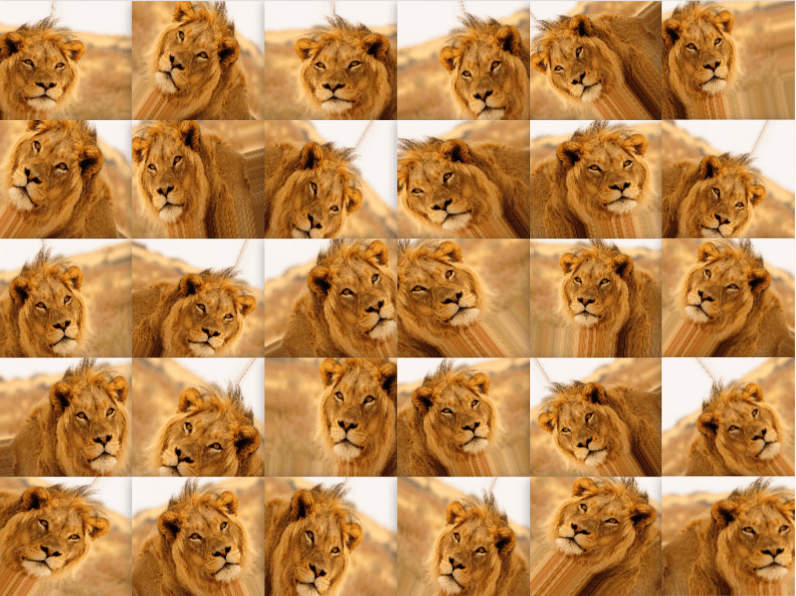

In [ ]:
train_datagen = ImageDataGenerator(
     rescale=1./255,
     rotation_range=30,
     shear_range=0.3,
     zoom_range=0.3,
     horizontal_flip=True,
     fill_mode='nearest')

#rescale=1./255: Normaliza os valores dos pixels das imagens, que variam de 0 a 255, para o intervalo de 0 a 1.
#                Isso é importante para que a rede neural aprenda melhor, pois valores de entrada mais baixos geralmente
#                resultam em um treinamento mais estável.
#rotation_range=30: Permite rotações aleatórias das imagens em até 30 graus, o que ajuda a aumentar a diversidade do conjunto de treinamento.
#shear_range=0.3: Aplica uma transformação de cisalhamento, distorcendo a imagem de maneira aleatória.
#zoom_range=0.3: Permite zoom aleatório de até 30% nas imagens, o que também aumenta a variedade dos dados.
#horizontal_flip=True: Permite a inversão horizontal das imagens, útil para casos em que a orientação não importa, como em rostos.
#fill_mode='nearest': Define como preencher os pixels que são criados após as transformações (como rotação e zoom), o modo 'nearest' usa o valor do pixel mais próximo.

validation_datagen = ImageDataGenerator(rescale=1./255)
#Para o conjunto de validação, apenas a normalização é aplicada, pois não é comum aplicar aumentação de dados na validação;
#queremos avaliar o modelo em dados que refletem sua performance em dados reais.

train_generator = train_datagen.flow_from_directory(
     train_data_dir,
     color_mode='grayscale',
     target_size=(IMG_HEIGHT, IMG_WIDTH),
     batch_size=batch_size,
     class_mode='categorical',
     shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
       validation_data_dir,
       color_mode='grayscale',
       target_size=(IMG_HEIGHT, IMG_WIDTH),
       batch_size=batch_size,
       class_mode='categorical',
       shuffle=True)

#flow_from_directory: Este método permite que o gerador leia as imagens diretamente de um diretório.
#                     É necessário que as imagens estejam organizadas em subpastas, onde cada subpasta corresponde a uma classe.
#train_data_dir: O diretório onde os dados de treinamento estão armazenados.
#color_mode='grayscale': Especifica que as imagens são em escala de cinza.
#target_size=(IMG_HEIGHT, IMG_WIDTH): Redimensiona todas as imagens para o tamanho especificado.
#batch_size=batch_size: Define quantas imagens serão processadas em cada iteração (batch).
#class_mode='categorical': Para tarefas de classificação multiclasse, isso configura as labels como uma
#                          matriz one-hot (por exemplo, para 7 classes, uma imagem pode ser representada como [0, 1, 0, 0, 0, 0, 0]).
#shuffle=True: Embaralha as imagens a cada época, o que ajuda a melhorar a generalização do modelo.

class_labels=['Raiva','Desgosto', 'Medo', 'Feliz','Neutro','Triste','Surpresa']
#Este array contém os rótulos das classes que o modelo irá prever.
#Cada índice corresponde a uma classe específica que o modelo deve aprender a identificar.

img, label = train_generator.__next__()
#train_generator.__next__(): Este método retorna a próxima batch de imagens e suas respectivas labels. Isso é útil para visualizar como os dados estão sendo alimentados no modelo.

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


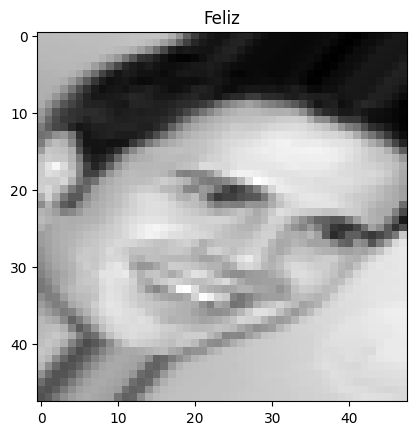

In [ ]:
#Mostranod uma imagem aleatória
import random

i = random.randint(0, (img.shape[0])-1)
image = img[i]

lbl = class_labels[label[i].argmax()]

plt.imshow(image[:,:,0], cmap='gray')
plt.title(lbl)
plt.show()

##Camadas Convolucionais:
###Extração de Características:
As camadas convolucionais são responsáveis por extrair características relevantes das imagens. Aumentar a profundidade da rede (número de camadas), a rede se torna capaz de capturar características mais complexas.
###Hierarquia de Características:
Nas camadas iniciais, a rede pode aprender a detectar características básicas, como bordas e texturas. À medida que você adiciona camadas, a rede começa a identificar características mais complexas, como formas e padrões.
###Número de Filtros:
O número de filtros geralmente aumenta com a profundidade da rede. Isso é feito porque, em camadas mais profundas, você precisa capturar uma quantidade maior de características complexas.

*  64 Filtros na 1ª Camada: Captura características simples.
*  128 Filtros na 2ª Camada: Permite que a rede reconheça formas mais complexas.
*  512 Filtros nas Camadas 3 e 4: Captura padrões ainda mais complexos, já que a rede precisa processar informações mais abstratas.

###Tamanhos de Filtros:
O tamanho dos filtros também pode variar. Filtros menores (como 3x3) são usados em camadas mais profundas para permitir uma detecção mais fina de características, enquanto filtros maiores (como 5x5) podem ser usados nas camadas iniciais para capturar mais contexto.

###Max Pooling:
Usado após cada camada convolucional, reduz a dimensionalidade da saída, mantendo as características mais relevantes. Isso ajuda a diminuir a carga computacional e a prevenir overfitting, mantendo a informação mais importante.


Para o max pooling 2x2
```
1  3  2  4
5  6  1  2
4  5  3  2
2  1  0  3
```
Temos a seguinte resposta, mantendo as caracteristicas
```
6  4
5  3
```

##Camadas Densas:
###Classificação:
As camadas densas (fully connected) conectam todas as características extraídas pela parte convolucional e fazem a classificação final. Normalmente, são usadas menos camadas densas porque elas têm muitos parâmetros e podem levar ao overfitting se não forem bem controladas.

###Conexões Completas:
Todas as unidades em uma camada densa estão conectadas a todas as unidades da camada anterior. Isso permite que a rede combine as características extraídas em um nível mais alto, fazendo as previsões finais.

##Softmax
Softmax é uma função de ativação frequentemente utilizada na camada de saída de redes neurais para problemas de classificação multi-classe. A função transforma um vetor de valores reais em um vetor de probabilidades, onde a soma das probabilidades é igual a 1. Isso a torna ideal para tarefas em que queremos classificar uma entrada em uma de várias categorias.

In [ ]:

#As camadas serão adicionadas em uma sequência linear.
model = Sequential()

#Priemira camada
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
#Conv2D(64, (3, 3)...): Cria uma camada convolucional com 64 filtros de tamanho 3x3.
#padding='same': O tamanho da saída é o mesmo que a entrada, adicionando zeros nas bordas, se necessário.
#input_shape=(48, 48, 1): Especifica a forma das imagens de entrada, que são imagens em escala de cinza de 48x48 pixels.
#BatchNormalization(): Normaliza a saída da camada anterior, melhorando a estabilidade e a velocidade do treinamento.
#Activation('relu'): Aplica a função de ativação ReLU, que introduz não-linearidade e ajuda a evitar o problema do gradiente desvanecido.
#MaxPooling2D(pool_size=(2, 2)): Reduz a dimensionalidade da saída da camada convolucional, mantendo as características mais relevantes.
#Dropout(0.25): Desliga aleatoriamente 25% dos neurônios durante o treinamento para evitar overfitting.

#Segunda camada
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))
#Aumenta o número de filtros para 128 e usa um tamanho de filtro de 5x5, repetindo o processo de normalização, ativação, pooling e dropout.

#Terceira camada
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))
#O número de filtros aumenta para 512, mantendo um tamanho de filtro de 3x3.
#Este é um padrão comum em CNNs, onde o número de filtros aumenta nas camadas mais profundas.

#Quarta camada
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#Uma nova camada convolucional com 512 filtros de 3x3 é adicionada, finalizando a parte convolucional da rede.

model.add(Flatten())
#Flatten(): Converte a saída multidimensional da última camada convolucional em um vetor unidimensional.

#Conecta com a primeira camada
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#Dense(256): Cria uma camada densa com 256 neurônios.
#A normalização, ativação e dropout são aplicados da mesma forma que nas camadas anteriores.

#Conecta com a segunda camada
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#Uma segunda camada densa com 512 neurônios é adicionada, seguindo o mesmo padrão.

model.add(Dense(7, activation='softmax'))
#Dense(7, activation='softmax'): A camada de saída tem 7 neurônios (uma para cada classe de emoção) e usa a função de ativação softmax.
#Isso transforma as saídas em probabilidades que somam 1, permitindo que o modelo faça previsões sobre a classe da imagem.




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

```
optimizer=Adam(learning_rate=0.001)
```
*  Optimizer (Otimizador): O otimizador é um algoritmo que ajusta os pesos do modelo com base nos dados de treinamento e na função de perda.

*  Adam: O Adam (Adaptive Moment Estimation) é um dos otimizadores mais populares e eficazes, combinando as vantagens de dois outros otimizadores, RMSProp e Momentum. Ele adapta a taxa de aprendizado para cada peso do modelo com base nas estimativas de primeiro e segundo momentos dos gradientes.

```
learning_rate=0.001
```
A taxa de aprendizado (learning rate) controla o quanto os pesos do modelo são ajustados a cada iteração. Um valor de 0.001 é comumente usado como ponto de partida. Taxas de aprendizado muito altas podem levar a um treinamento instável, enquanto taxas muito baixas podem tornar o treinamento muito lento.

```
loss='categorical_crossentropy'
```
*  Loss (Função de Perda): A função de perda mede quão bem o modelo está se saindo em relação às saídas esperadas. Ela fornece feedback sobre como melhorar os pesos do modelo durante o treinamento.
*  categorical_crossentropy: Esta função de perda é usada para problemas de classificação multi-classe, onde cada entrada é atribuída a uma única classe entre várias. Ela calcula a diferença entre a distribuição de probabilidade prevista pelo modelo (após a aplicação do Softmax) e a distribuição de probabilidade verdadeira (as classes one-hot).

```
metrics=['accuracy']
```
*  Metrics (Métricas): As métricas são usadas para monitorar o desempenho do modelo durante o treinamento e a validação.
*  accuracy: A precisão (accuracy) mede a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões. É uma métrica padrão para problemas de classificação.

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Conta a quantidade de imagens em cada pasta

train_path = "train/"
test_path = "test/"

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

print("Numero de imagens para treino: ",num_train_imgs)
print("Numero de imagens para teste: ",num_test_imgs)

Numero de imagens para treino:  28709
Numero de imagens para teste:  7178


In [ ]:
#Salvar o modelo durante o treinamento, especificamente quando ele apresenta a melhor performance em termos de perda de validação.
checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

#'best_model.keras': O nome do arquivo onde o modelo será salvo.
#monitor='val_loss': O callback irá monitorar a perda de validação (val_loss).
#save_best_only=True: Apenas salvará o modelo se a perda de validação melhorar (ou seja, for menor que a perda anteriormente salva).
#mode='min': Indica que a melhor performance é alcançada quando a val_loss é a menor possível.
#verbose=1: Mostra mensagens no console sobre quando o modelo é salvo.

#Parar o treinamento se a performance do modelo não melhorar após um certo número de épocas.
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True
)

#monitor='val_loss': O callback monitora a perda de validação.
#min_delta=0: A melhoria mínima a ser considerada (neste caso, qualquer melhoria conta).
#patience=3: O número de épocas que devemos esperar para ver se há uma melhoria antes de parar o treinamento.
#verbose=1: Mostra mensagens no console quando o treinamento é interrompido.
#restore_best_weights=True: Restaura os melhores pesos do modelo após o treinamento ser interrompido.

#Reduzir a taxa de aprendizado quando a performance do modelo estagnar, ajudando a evitar que o modelo fique preso em um mínimo local.
reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001
)

#monitor='val_loss': Monitora a perda de validação.
#factor=0.2: A taxa de aprendizado será multiplicada por 0.2 quando a condição for atendida (ou seja, se não houver melhoria).
#patience=3: O número de épocas que devemos esperar para ver se há uma melhoria antes de reduzir a taxa de aprendizado.
#verbose=1: Exibe mensagens sobre quando a taxa de aprendizado é reduzida.
#min_delta=0.0001: A melhoria mínima a ser considerada para não reduzir a taxa de aprendizado.

#Lista de callbacks
callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
#Essa lista pode ser passada como argumento para o método fit()

In [ ]:
#Quantidade de épocas
epochs=50

#Treina o modelo
history=model.fit(
    train_generator,
    steps_per_epoch=num_train_imgs//train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=num_test_imgs//validation_generator.batch_size,
    callbacks=callbacks_list
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2378 - loss: 1.9673
Epoch 1: val_loss improved from inf to 1.70021, saving model to best_model.keras
897/897 ━━━━━━━━━━━━━━━━━━━━ 60s 50ms/step - accuracy: 0.2378 - loss: 1.9672 - val_accuracy: 0.3225 - val_loss: 1.7002 - learning_rate: 0.0010
Epoch 2/50
  1/897 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.2500 - loss: 1.7746

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 1.70021 to 1.64114, saving model to best_model.keras
897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2500 - loss: 1.7746 - val_accuracy: 0.2000 - val_loss: 1.6411 - learning_rate: 0.0010
Epoch 3/50
895/897 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3238 - loss: 1.6998
Epoch 3: val_loss did not improve from 1.64114
897/897 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.3239 - loss: 1.6996 - val_accuracy: 0.3542 - val_loss: 1.7088 - learning_rate: 0.0010
Epoch 4/50
  1/897 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.4375 - loss: 1.4038
Epoch 4: val_loss did not improve from 1.64114
897/897 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4375 - loss: 1.4038 - val_accuracy: 0.1000 - val_loss: 2.4612 - learning_rate: 0.0010
Epoch 5/50
895/897 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4135 - loss: 1.5121
Epoch 5: val_loss improved from 1.64114 to 1.40915, saving model to best_model.keras
897/897 ━━━━━━━━━━━━━━━━━━━━ 38s 36ms/step - acc

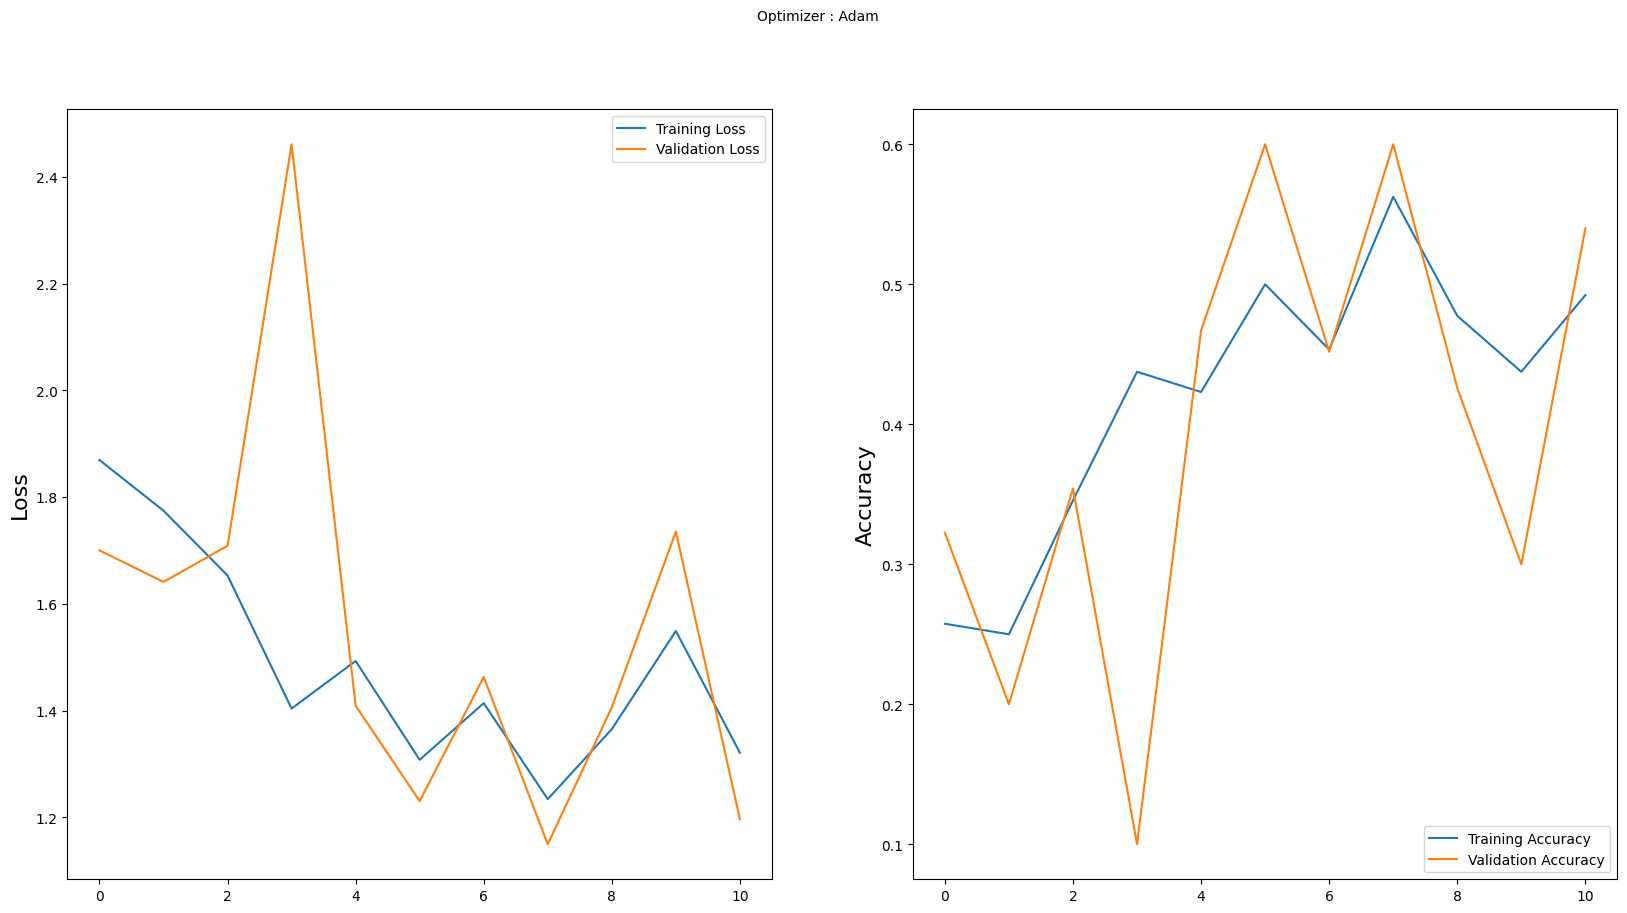

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save('emotion_detection_model.keras')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import face_recognition

video = cv2.VideoCapture('video.mp4')
res = (800,600)
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('video_final.mp4', fourcc, 20.0, res)

#Carrega o modelo
face_model = load_model('emotion_detection_model.keras', compile=False)

emotion_labels = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

while True:
  ret, frame = video.read()
  if not ret:
    break
  frame_resized = cv2.resize(frame, (0,0), fx=0.25, fy=0.25)
  locations = face_recognition.face_locations(frame_resized, model="hog")
  for index, location in enumerate(locations):
    top, right, bottom, left = location

    rosto = frame[top*4:bottom*4, left*4:right*4]
    rosto = cv2.cvtColor(rosto, cv2.COLOR_BGR2GRAY)
    rosto = cv2.resize(rosto, (48,48))
    img_pixels = image.img_to_array(rosto)
    img_pixels = np.expand_dims(img_pixels, axis = 0)
    img_pixels /= 255

    predictions = face_model.predict(img_pixels)
    max_index = np.argmax(predictions[0])
    emotion_label = emotion_labels[max_index]

    cv2.putText(frame, emotion_label, (left*4, top*4), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
    #cv2.rectangle(frame, (left*4, top*4), (right*4, bottom*4), (0,0,255), 2)

  frame_output = cv2.resize(frame, res)
  out.write(frame_output)

video.release()
out.release()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━